In [4]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis import distances
import numpy as np

/user/work/fh22600/miniforge3/envs/mda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/user/work/fh22600/miniforge3/envs/mda/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [5]:
filepath = "/user/work/fh22600/1A0_Sim"

In [6]:
times = [50, 60, 70, 75, 80, 90, 100, 110, 120, 125, 130, 140, 150, 160, 170, 175, 180, 190, 200,210, 220, 225, 230, 240, 250, 260, 270, 275, 280, 290, 300,310, 320, 325, 330, 340, 350, 360,370, 375, 380, 390, 400, 410, 420, 425, 430, 440, 450, 460, 470, 475, 480, 490,500 ]


In [7]:
# times = set([time for time in range(50,510,10)] + [time for time in range(50,510,25)])

In [8]:
# times = list(times)

In [9]:
runs = range(1,11) ## 1 to 10 
#times = [50, 60, 70, 75, 80, 90, 100, 110, 120, 125, 130, 140, 150, 160, 175, 180, 190, 200,210, 220, 225, 230, 240, 250, 260, 275, 280, 290, 300,310, 320, 325, 330, 340, 350, 360,370, 375, 380, 390, 400, 410, 420, 425, 430, 440, 450, 460, 470, 475, 480, 490,500 ]

time_points = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
average_changes = []
with open('distances_output.txt', 'w') as f:
    f.write("NETime(ps)\tMD_run\tEstarttime(ns)\tE_Distance(Å)\tNE_Distance(Å)\tChange(Å)\n")
    
    for tp in time_points:
        e_dists = []
        ne_dists = []
        dist_changes = []
        for run in runs:
            for time in times:
            
                ref = mda.Universe(f'{filepath}/Repeat_{run}/ns_{time}/equil/md{time}_{tp}.pdb') 
                other = mda.Universe(f'{filepath}/Repeat_{run}/ns_{time}/md{time}_{tp}.pdb')
                
                align.alignto(other, ref, select='name CA')
                ## just need to calculate loop distance for non equilibrium
                neloopatom1 = other.select_atoms('(resid 57) and (name CA)')
                neloopatom2 = other.select_atoms('(resid 187) and (name CA)')
                
                resids1, resids2, ne_dist = distances.dist(neloopatom1, neloopatom2, offset=0)

                eloopatom1 = ref.select_atoms('(resid 57) and (name CA)')
                eloopatom2 = ref.select_atoms('(resid 187) and (name CA)')
                
                resids1, resids2, e_dist = distances.dist(eloopatom1, eloopatom2, offset=0)

                e_dists.append(e_dist[0])
                ne_dists.append(ne_dist[0])
                dist_change = ne_dist[0] - e_dist[0]
                #avg_distance = np.mean(dist)
                dist_changes.append(dist_change)
                #print(dist_change)
        #overall_avg_distance = np.mean(loopdistances)
        #f.write(f"{tp}\t{overall_avg_distance:.3f}\n")

                f.write(f"{tp}ns\t{run}\t{time}\t{np.mean(e_dist):.3f}\t{np.mean(ne_dist):.3f}\t{np.mean(dist_change):.3f}\n") 

        timepoint_avg = np.mean(dist_changes) if dist_changes else 0.0   

        f.write(f"{tp}ns\tAverage\tAverage\t{np.mean(e_dists):.3f}\t{np.mean(ne_dists):.3f}\t{timepoint_avg:.3f}\n")
        average_changes.append(timepoint_avg)          

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
time_points = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [12]:
plt.plot(time_points[:len(average_changes)], average_changes)

NameError: name 'average_changes' is not defined

In [16]:
import pandas as pd

In [17]:
all_df = pd.read_csv("distances_output.txt", sep='\t')

In [18]:
averages_df = all_df[all_df["MD_run"] == "Average"]

In [19]:
averages_df

,NETime(ps),MD_run,Estarttime(ns),E_Distance(Å),NE_Distance(Å),Change(Å)
550,0ns,Average,Average,17.483,17.483,0.000
1101,10ns,Average,Average,17.606,17.515,-0.091
1652,20ns,Average,Average,17.610,17.478,-0.132
2203,30ns,Average,Average,17.629,17.453,-0.176
2754,40ns,Average,Average,17.596,17.466,-0.130
3305,50ns,Average,Average,17.597,17.435,-0.162
3856,60ns,Average,Average,17.543,17.482,-0.061
4407,70ns,Average,Average,17.534,17.402,-0.132
4958,80ns,Average,Average,17.576,17.399,-0.177
5509,90ns,Average,Average,17.549,17.450,-0.099


Plotting change in loop distance for 1A53-2 and 1A53-2.5

In [20]:
error = []
for i, tp in enumerate(time_points):
    time = str(tp)+"ns"
    df = all_df[(all_df["NETime(ps)"] == time) & (all_df['MD_run'] != "Average")]
    average = df['Change(Å)'].mean()
    tp_error = df['Change(Å)'].std()
    tp_se = tp_error/(np.sqrt(len(df)))
    error.append(tp_se)

df
error

[0.0,
 0.09393040413337767,
 0.09458049738061322,
 0.09132585733271595,
 0.08799957471182362,
 0.0904609719358928,
 0.0886137319564655,
 0.09093896473221977,
 0.08922247541494711,
 0.09073068159880517,
 0.09052326263336025]

In [21]:
evolved_df = pd.read_csv("/user/work/fh22600/1A5_Sim/distances_output.txt", sep='\t')

In [22]:
evolved_error = []
for i, tp in enumerate(time_points):
    time = str(tp)+"ns"
    e_df = evolved_df[(evolved_df["NETime(ps)"] == time) & (all_df['MD_run'] != "Average")]
    e_average = df['Change(Å)'].mean()
    e_tp_error = df['Change(Å)'].std()
    e_tp_se = e_tp_error/(np.sqrt(len(df)))
    evolved_error.append(e_tp_se)



In [23]:

e_averages_df = evolved_df[evolved_df["MD_run"] == "Average"]

In [24]:
e_averages_df = e_averages_df[:11]

In [25]:
e_averages_df

,NETime(ps),MD_run,Estarttime(ns),E_Distance(Å),NE_Distance(Å),Change(Å)
550,0ns,Average,Average,14.767,14.767,0.000
1101,10ns,Average,Average,14.798,14.753,-0.044
1652,20ns,Average,Average,14.824,14.702,-0.122
2203,30ns,Average,Average,14.823,14.688,-0.135
2754,40ns,Average,Average,14.768,14.682,-0.086
3305,50ns,Average,Average,14.765,14.659,-0.106
3856,60ns,Average,Average,14.714,14.640,-0.074
4407,70ns,Average,Average,14.780,14.644,-0.136
4958,80ns,Average,Average,14.788,14.669,-0.119
5509,90ns,Average,Average,14.797,14.699,-0.099


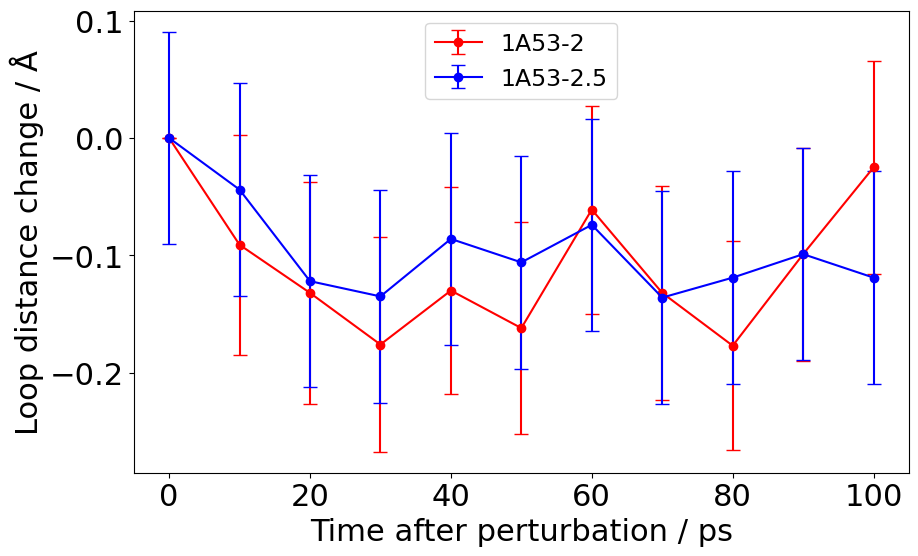

In [26]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size':22})
plt.errorbar(time_points, averages_df['Change(Å)'], color='red', yerr=error, fmt='-o', ecolor='red',capsize=5, label='1A53-2')
plt.errorbar(time_points, e_averages_df['Change(Å)'], color='blue',yerr=evolved_error, fmt='-o', ecolor='blue',capsize=5, label='1A53-2.5')

plt.xlabel('Time after perturbation / ps')
#plt.title('Change in distance between loops 57 and 187 in perturbed 1A53-2 and 1A53-2.5 compared to equilibrium')
plt.ylabel('Loop distance change / Å')
plt.legend(loc='upper center',prop={'size':17})

#plt.errorbar(time_points,designed_disp, yerr=designedyerr, fmt='-o', ecolor='red',capsize=5, label='Designed')

Loop distances over time for 1A53-2 and 1A53-2.5

In [27]:
evolved_df = pd.read_csv("/user/work/fh22600/1A5_Sim/distances_output.txt", sep='\t')

In [28]:
evolved_df

,NETime(ps),MD_run,Estarttime(ns),E_Distance(Å),NE_Distance(Å),Change(Å)
0,0ns,1,50,9.710,9.710,0.000
1,0ns,1,60,10.908,10.908,0.000
2,0ns,1,70,9.823,9.823,0.000
3,0ns,1,75,8.659,8.659,0.000
4,0ns,1,80,11.436,11.436,0.000
...,...,...,...,...,...,...
8811,150ns,10,475,14.235,13.729,-0.506
8812,150ns,10,480,16.379,13.464,-2.916
8813,150ns,10,490,16.359,15.574,-0.786
8814,150ns,10,500,12.454,16.554,4.099


In [29]:
evolved_averages_df = evolved_df[evolved_df["MD_run"] == "Average"]

In [30]:
evolved_averages_df = evolved_averages_df[:11]

In [31]:
time_points = [0,10,20,30,40,50,60,70,80,90,100]

In [32]:
evolved_ne_error = [] 
evolved_e_error = []
for i, tp in enumerate(time_points):
    time = str(tp)+"ns"
    e_df = evolved_df[(evolved_df["NETime(ps)"] == time) & (evolved_df['MD_run'] != "Average")]
    evolved_average = e_df['Change(Å)'].mean()
    e_ne_sd = e_df['NE_Distance(Å)'].std()
    e_ne_se = e_ne_sd/(np.sqrt(550))
    evolved_ne_error.append(e_ne_se)

    e_e_sd = e_df['E_Distance(Å)'].std()
    e_e_se = e_e_sd/(np.sqrt(len(df)))
    evolved_e_error.append(e_e_se)


Text(0.5, 0, 'Time after perturbation / ps')

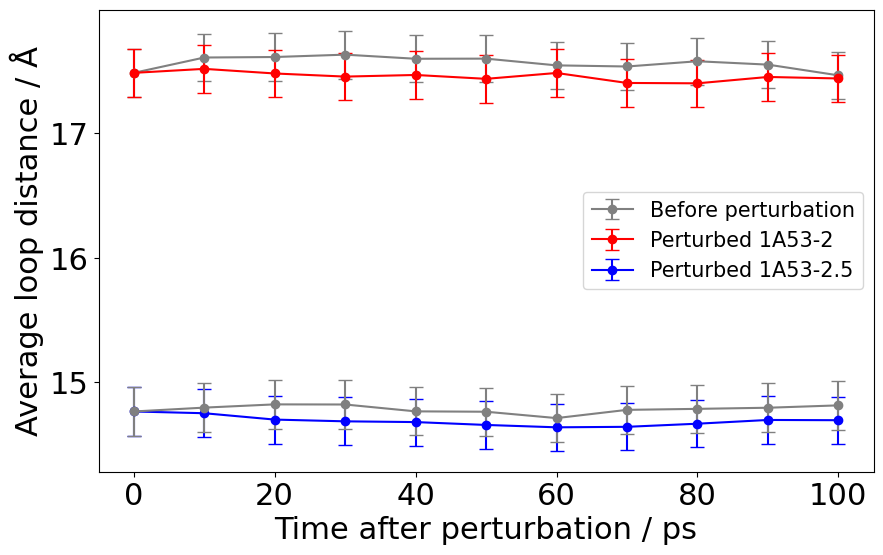

In [33]:
plt.figure(figsize=(10,6))
plt.errorbar(time_points, averages_df['E_Distance(Å)'], color='gray',yerr=e_error, fmt='-o', ecolor='gray',capsize=5,label='Before perturbation')
plt.errorbar(time_points, averages_df['NE_Distance(Å)'], color='red', yerr=ne_error, fmt='-o', ecolor='red',capsize=5, label='Perturbed 1A53-2')


plt.errorbar(time_points, evolved_averages_df['NE_Distance(Å)'], color='blue', yerr=evolved_ne_error, fmt='-o', ecolor='blue',capsize=5,label='Perturbed 1A53-2.5')
plt.errorbar(time_points, evolved_averages_df['E_Distance(Å)'], color='gray',yerr=evolved_e_error, fmt='-o', ecolor='gray',capsize=5)
plt.legend(prop={'size':15})
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.legend(bbox_to_anchor=(1, 1), prop={'size':15})
plt.ylabel('Average loop distance / Å', wrap='true')
plt.xlabel('Time after perturbation / ps')
#plt.title('Distance between loops 57 and 187 before and after ligand removal in 1A53-2 and 1A53-2.5')